In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [26]:
# Make two interleaving half circles
X, y = datasets.make_moons(n_samples=100, noise=0.25, random_state=666)

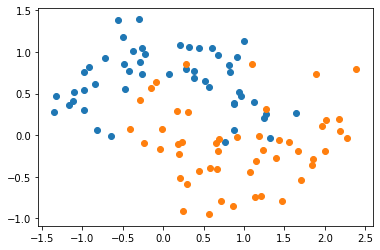

In [27]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [28]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
def plot_decision_boundary(model, axis):
    """绘制决策边界"""
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['yellow', 'white'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    plt.contour(x0, x1, zz, levels=20, linewidths=0)

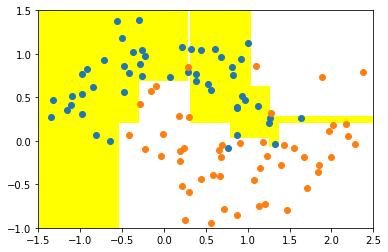

In [30]:
plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5]) # 过拟合
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

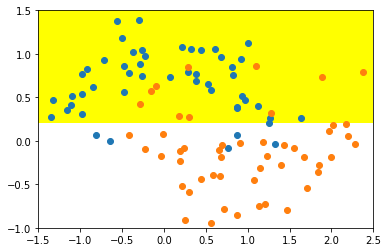

In [31]:
dt_clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=2) # 树的最大深度
"""
criterionstr, optional (default=”gini”)
    The function to measure the quality of a split. Supported criteria are “gini” for the
    Gini impurity and “entropy” for the information gain.

max_depthint or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until 
    all leaves contain less than min_samples_split samples.
"""
dt_clf2.fit(X, y)

plot_decision_boundary(dt_clf2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

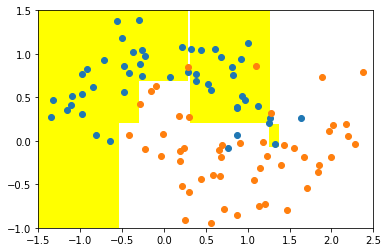

In [32]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=5) # 内部节点再划分所需最小样本数
"""
min_samples_splitint, float, optional (default=2)
    The minimum number of samples required to split an internal node:

    1. If int, then consider min_samples_split as the minimum number.
    2. If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are
       the minimum number of samples for each split.
"""
dt_clf3.fit(X, y)

plot_decision_boundary(dt_clf3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

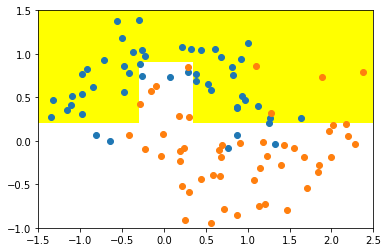

In [33]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6) # 叶子结点所需的最小样本数
'''
min_samples_leafint, float, optional (default=1)
    The minimum number of samples required to be at a leaf node. A split point at any depth will only 
    be considered if it leaves at least min_samples_leaf training samples in each of the left and 
    right branches. This may have the effect of smoothing the model, especially in regression.
    
    1. If int, then consider min_samples_leaf as the minimum number.
    2. If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are
       the minimum number of samples for each node.
'''
dt_clf4.fit(X, y)

plot_decision_boundary(dt_clf4, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

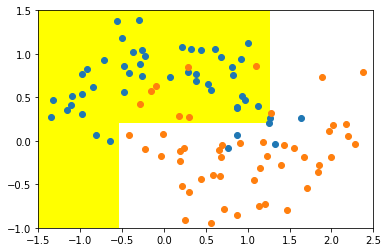

In [34]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=4) # 最多有max_leaf_nodes个叶子结点
'''
max_leaf_nodesint or None, optional (default=None)
    Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative
    reduction in impurity. If None then unlimited number of leaf nodes.
'''
dt_clf5.fit(X, y)

plot_decision_boundary(dt_clf5, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

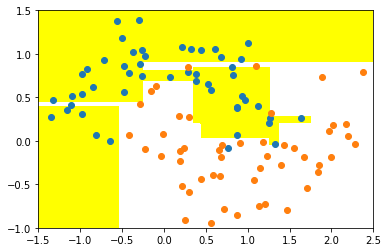

In [35]:
dt_clf6 = DecisionTreeClassifier(max_features=1) # 每次划分时使用的特征数量
'''
max_features : int, float, string or None, optional (default=None)
    The number of features to consider when looking for the best split:

    - If int, then consider `max_features` features at each split.
    - If float, then `max_features` is a fraction and
      `int(max_features * n_features)` features are considered at each
      split.
    - If "auto", then `max_features=n_features`.
    - If "sqrt", then `max_features=sqrt(n_features)`.
    - If "log2", then `max_features=log2(n_features)`.
    - If None, then `max_features=n_features`.
'''
dt_clf6.fit(X, y)

plot_decision_boundary(dt_clf6, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

